# Clustering

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import hdbscan
import seaborn as sns

In [2]:
# Read the dataset
dataSet  = pd.read_csv("DataSet/app-store-apple-data-set-10k-apps/AppleStore.csv")
random_state=42
dataSet.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
#  Drop the index, prime_genre and currency columns
dataSet = pd.concat([dataSet, pd.get_dummies(dataSet['cont_rating'], prefix_sep="cont_", dummy_na=False)], axis = 1)
dataSet.drop(labels=['Unnamed: 0', 'currency', 'prime_genre', 'ver', 'track_name', 'id', 'cont_rating'], axis=1, inplace=True)

# Standardize the dataset

df = pd.DataFrame(StandardScaler().fit_transform(dataSet), columns=dataSet.columns.values)

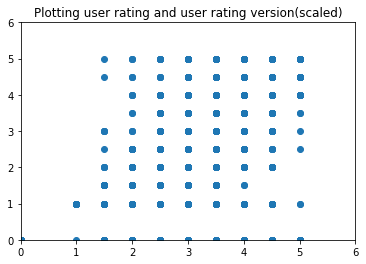

In [4]:
features = ['size_bytes','price','rating_count_tot','rating_count_ver','user_rating_ver', 'cont_rating',
            'sup_devices.num','ipadSc_urls.num','lang.num']
plt.title("Plotting user rating and user rating version(scaled)")
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.scatter(dataSet['user_rating'], dataSet['user_rating_ver']);

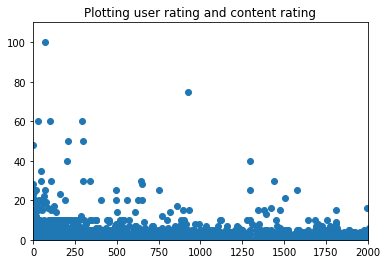

In [5]:
plt.title("Plotting user rating and content rating")
plt.xlim(0, 2000)
plt.ylim(0, 110)
plt.scatter(dataSet['rating_count_tot'], dataSet['price']);

[   0    1    2 ... 6022 6023 6024]


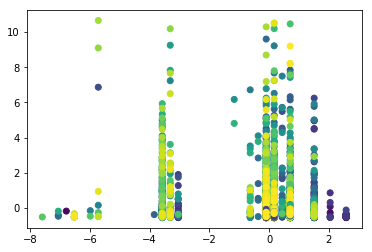

In [6]:
#  Using DBSCAN on the data with eps = 0.2 and min_samples = 5

cluster = DBSCAN(eps=0.1, min_samples=1)

cluster.fit(df)

labels = cluster.labels_

print(cluster.labels_)
plt.scatter(df['sup_devices.num'], df['size_bytes'], c=cluster.labels_);

[4 4 4 ... 1 2 4]


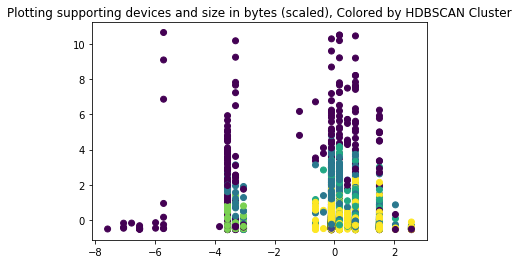

In [7]:
h_cluster = hdbscan.HDBSCAN(min_cluster_size = 100,      
                            gen_min_span_tree = True)

h_cluster.fit(df)

labels = h_cluster.labels_

print(h_cluster.labels_)

plt.title("Plotting supporting devices and size in bytes (scaled), Colored by HDBSCAN Cluster")
plt.scatter(df['sup_devices.num'], df['size_bytes'], c=h_cluster.labels_);


In [8]:
h_cluster.labels_

array([4, 4, 4, ..., 1, 2, 4])

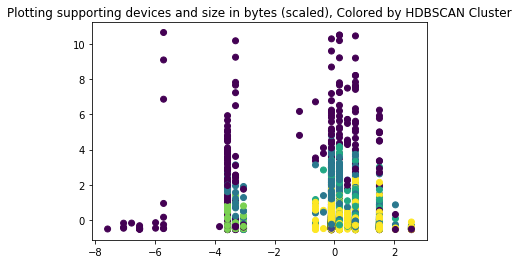

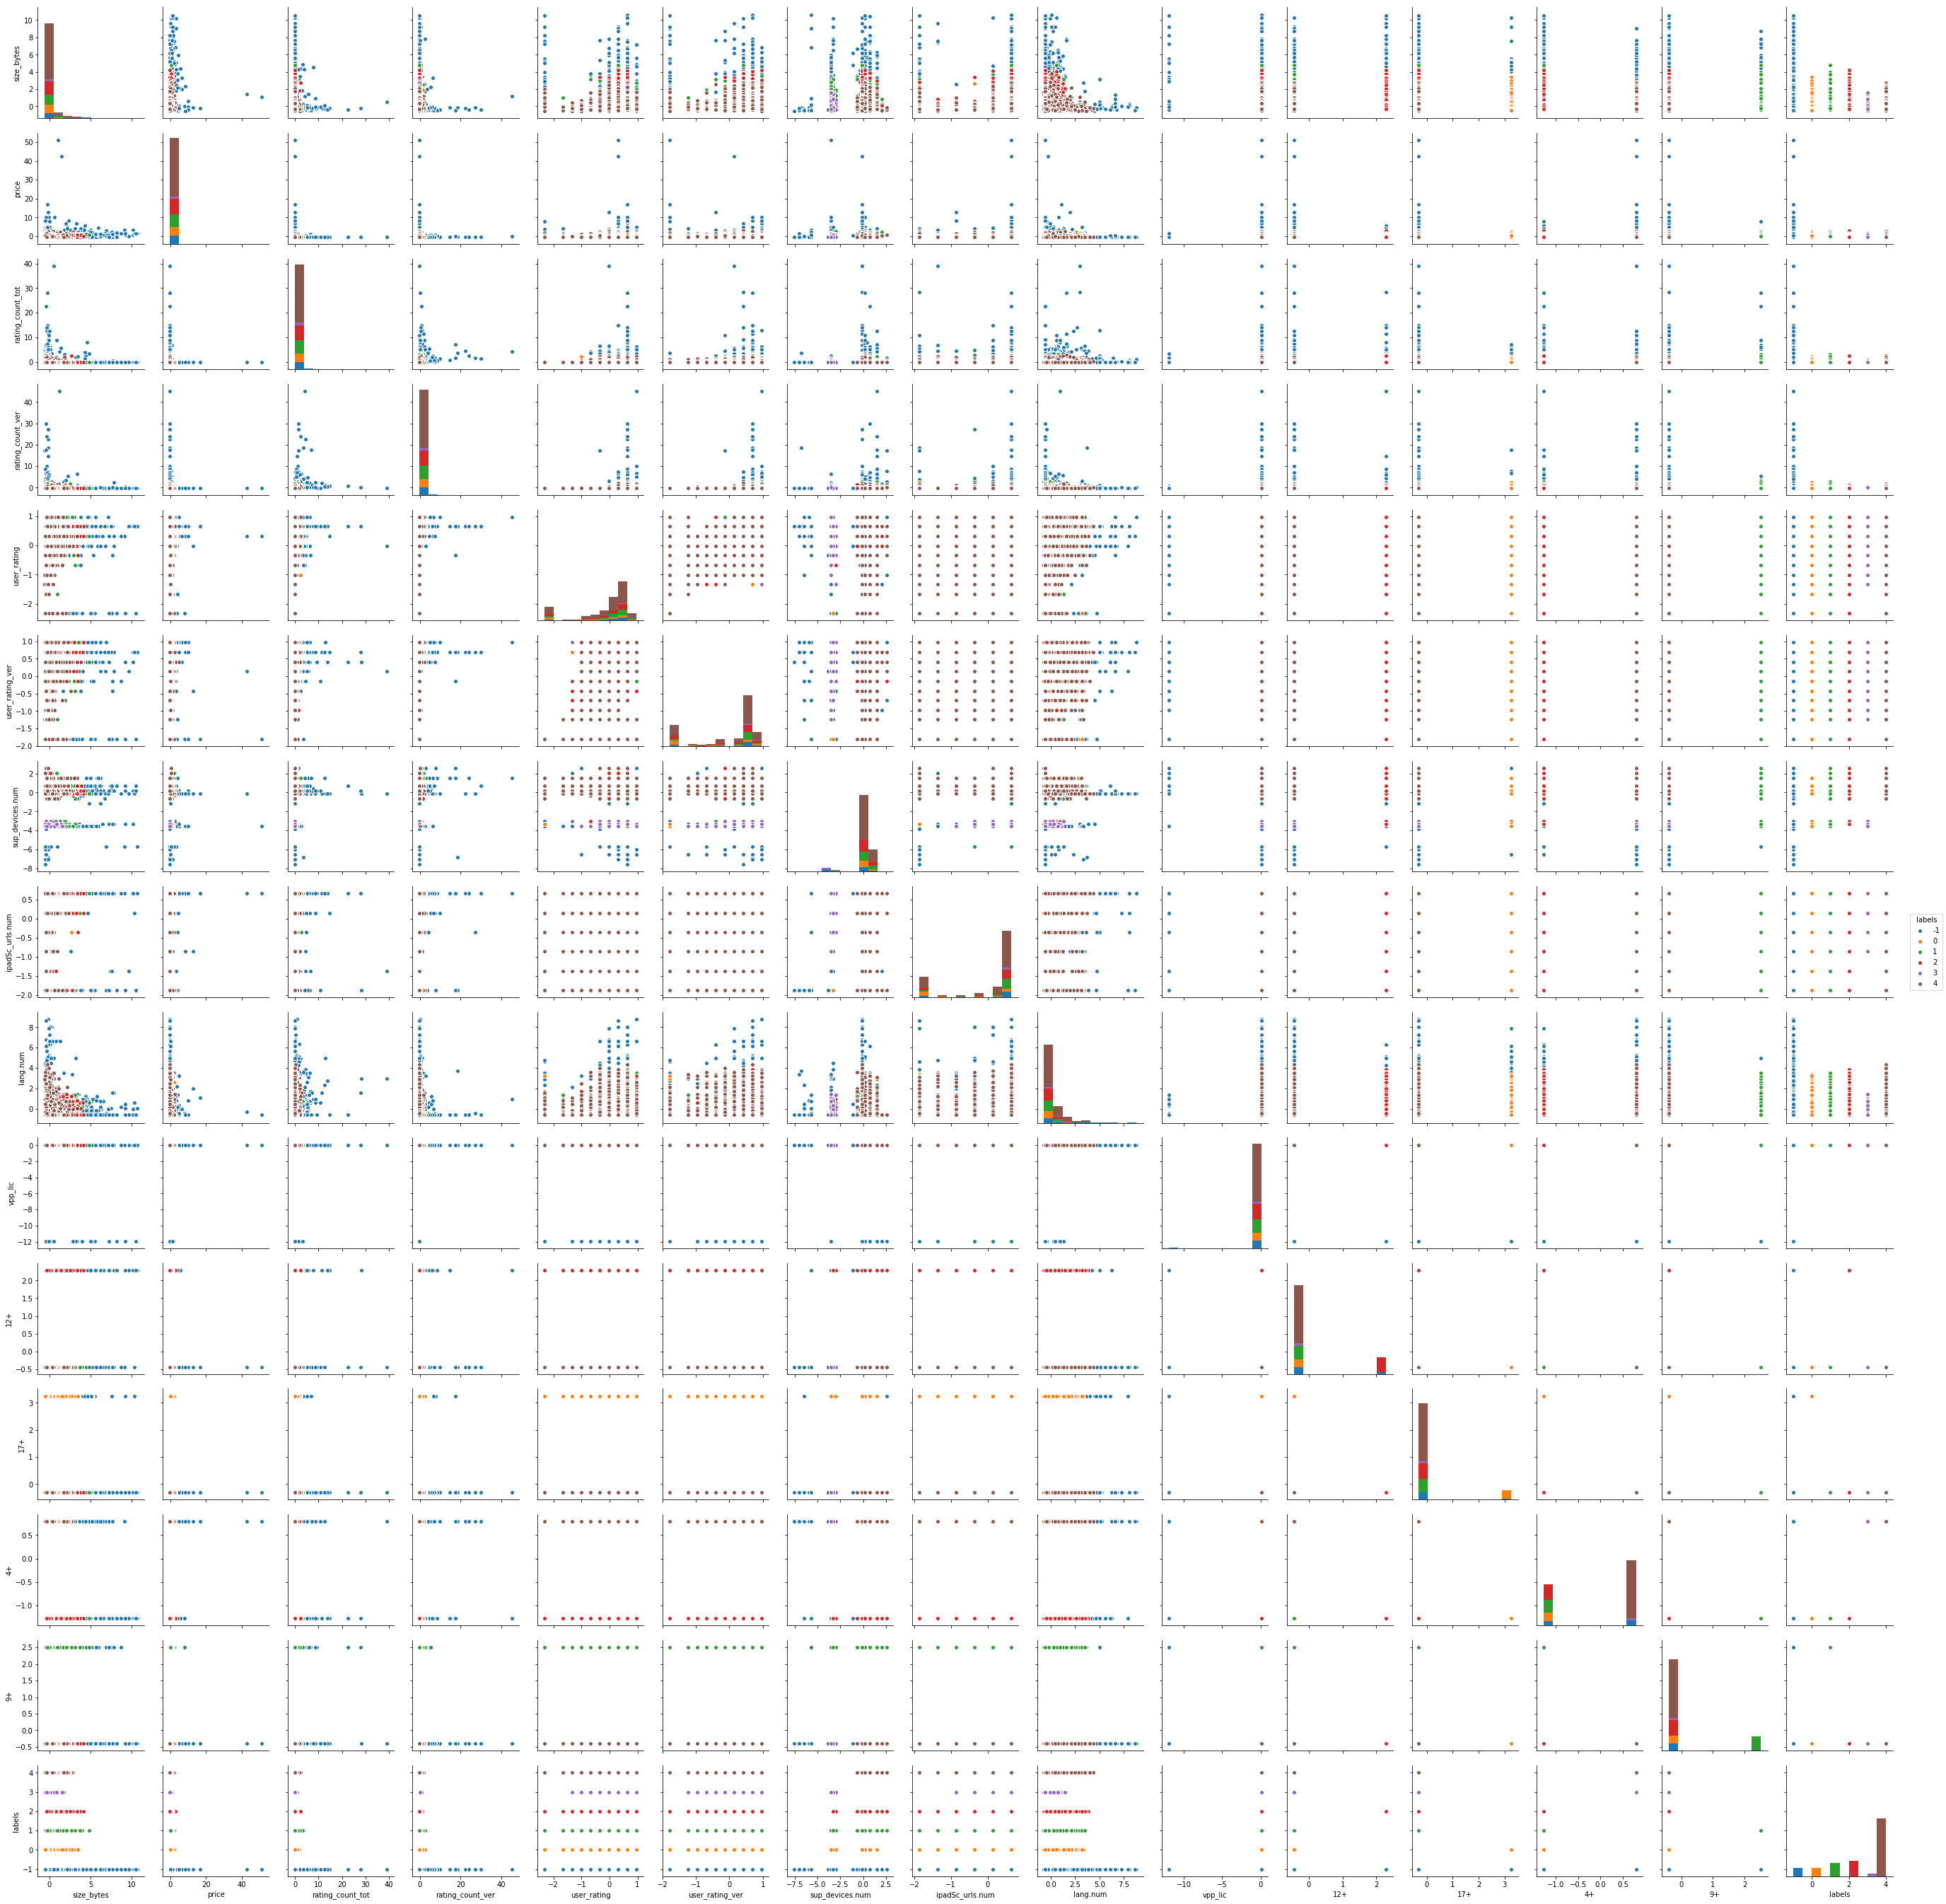

In [9]:
# subset = df.sample(200)

h_cluster = hdbscan.HDBSCAN(min_cluster_size = 100,      
                            gen_min_span_tree = True)
h_cluster.fit(df)

labels = h_cluster.labels_

df['labels'] = labels

#print(h_cluster.labels_)

plt.title("Plotting supporting devices and size in bytes (scaled), Colored by HDBSCAN Cluster")
plt.scatter(df['sup_devices.num'], df['size_bytes'], c=h_cluster.labels_);

sns.pairplot(df, hue='labels')